In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-disease/Datasets/Bacteria/2bc018ba-3c49-4cf4-9411-a93b7b196f45___FREC_Scab 3326.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Scab 2959.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/1d81b4c1-072d-4cf7-b1ca-ce43f59822d8___FREC_Scab 3406.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/3dd3d59c-be2a-4f29-8fa1-d4f37d7fb894___FREC_Scab 3412.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/2c89ceaf-748c-4371-80d0-d01855f04a92___FREC_Scab 2962.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/1f6abf22-93fa-48f0-a509-cc3e210f75f0___FREC_Scab 3172.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/2ae81857-0615-4a6a-8d13-1ace0c62284d___FREC_Scab 2992.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/1a4047d7-23d6-4bba-ba10-b6e7005ea01b___FREC_Scab 3193.JPG
/kaggle/input/leaf-disease/Datasets/Bacteria/03eccb1a-0368-4ac7-9f48-7546

# Loading the Data Set
In this part we load and split the data.

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to your dataset directory
dataset_dir = '/kaggle/input/leaf-disease/Datasets'

# The paths for the training and validation directories
train_dir = '/kaggle/working/training'
val_dir = '/kaggle/working/validation'

# The categories of your class
categories = ['Bacteria','Fungi', 'Nematodes', 'Normal', 'Virus']

# Split ratio for validation
val_split_ratio = 0.2

# Create the training and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for category in categories:
    # Create category-specific subdirectories in both the training and validation directories
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    
    # Get the full path for the current category
    category_path = os.path.join(dataset_dir, category)
    
    # Check if the category path exists
    if not os.path.exists(category_path):
        print(f"Category path does not exist: {category_path}")
        continue
    
    # List all files in the category directory
    all_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    
    # Split the files into training and validation sets
    train_files, val_files = train_test_split(all_files, test_size=val_split_ratio)
    
    # Copy the training files to the training directory
    for file_name in train_files:
        shutil.copy(os.path.join(category_path, file_name), os.path.join(train_dir, category, file_name))
        
    # Copy the validation files to the validation directory
    for file_name in val_files:
        shutil.copy(os.path.join(category_path, file_name), os.path.join(val_dir, category, file_name))

We import necessary modules and TensorFlow. TensorFlow is an open-source machine learning library. Keras, a part of TensorFlow, is used for building and training deep learning models.

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-03-11 12:48:03.704706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 12:48:03.704854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 12:48:03.907210: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Preparation
We define the base directory for our dataset and specify the subdirectories for training and validation sets.

In [6]:
# Define paths
base_dir = '/kaggle/working'
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')

In [7]:
# Define image dimensions
img_width, img_height = 150, 150
batch_size = 32

In [8]:
# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 191 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


In [9]:
# Load MobileNetV2 as base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

/tmp/ipykernel_33/2805745099.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
# Define the model
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # Final output layer with 5 classes
])

In [28]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [29]:
class AccuracyThresholdCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
            print('\nReached 98% accuracy for both training and validation. Stopping training.')
            self.model.stop_training = True
            
callback = AccuracyThresholdCallback()

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=1000,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[callback]
)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 883ms/step - accuracy: 0.3330 - loss: 2.0065 - val_accuracy: 0.5625 - val_loss: 1.0545
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6562 - loss: 0.8132 - val_accuracy: 0.6250 - val_loss: 1.0546
Epoch 3/1000


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.6507 - loss: 0.9588 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7500 - loss: 0.5389 - val_accuracy: 0.6562 - val_loss: 1.0828
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.7889 - loss: 0.6541 - val_accuracy: 0.8750 - val_loss: 0.4714
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.3374 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - accuracy: 0.8310 - loss: 0.4776 - val_accuracy: 0.8750 - val_loss: 0.3434
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9062 - loss: 0.1831 - val_accuracy: 0.7500 - val_loss: 0.7857
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - accuracy: 0.9156 - loss: 0.3267 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 1.0000 - loss: 0.1100 - val_accu

In [31]:
model.save('model.h5')

ValueError: Unable to synchronously create dataset (name already exists)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


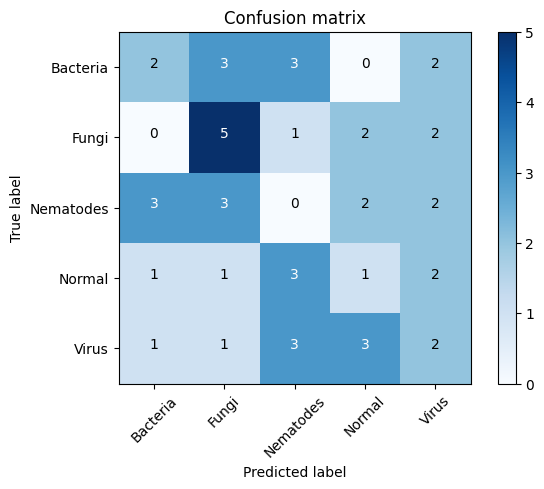

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(validation_generator, validation_generator.samples // batch_size+1)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = validation_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Class names
class_names = ['Bacteria','Fungi', 'Nematodes', 'Normal', 'Virus']

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix with class names
plot_confusion_matrix(confusion_mtx, classes=class_names)

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751,825 (10.50 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 329,228 (1.26 MB)

In [34]:
class_indices = train_generator.class_indices
print(class_indices)  

{'Bacteria': 0, 'Fungi': 1, 'Nematodes': 2, 'Normal': 3, 'Virus': 4}


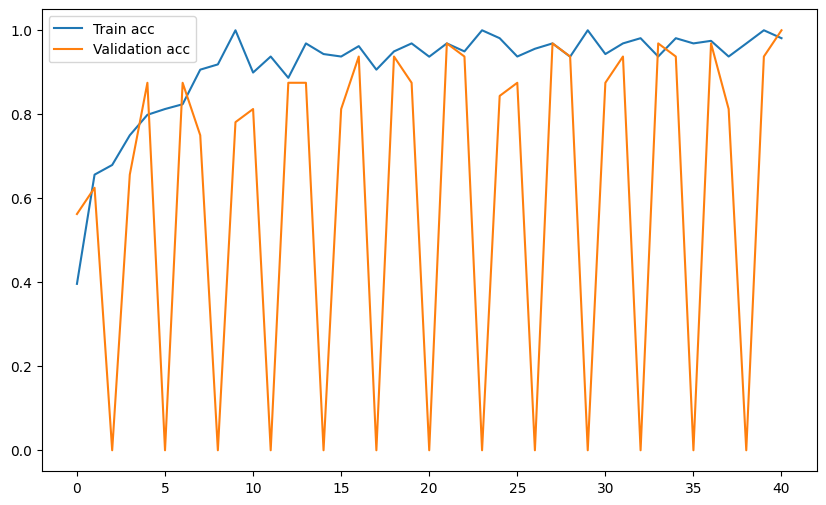

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

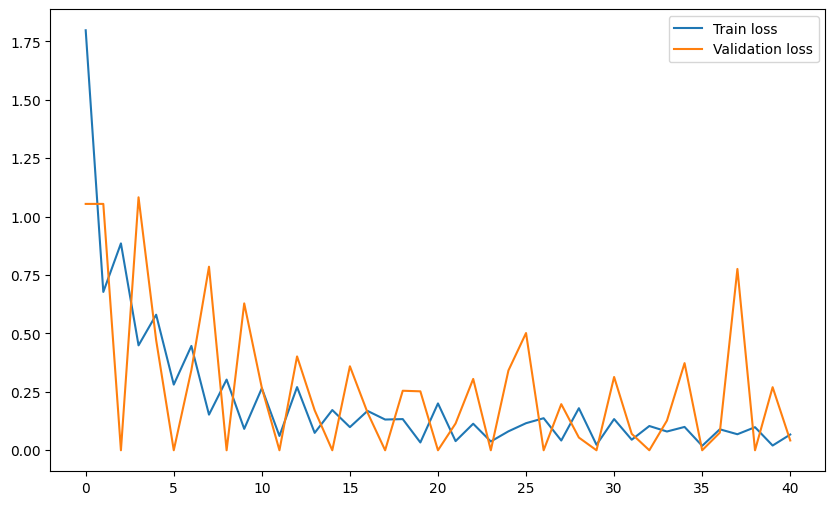

In [36]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()